In [32]:
import pandas as pd
import requests
from config import api_key
from citipy import citipy
import numpy as np
from matplotlib import pyplot as plt


url="http://api.openweathermap.org/data/2.5/weather?"

In [4]:
cities=[]

lats=np.random.uniform(high=-90, low=90, size=1500)
lons=np.random.uniform(high=-180, low=180, size=1500)
lats_lons=zip(lats,lons)
for value in lats_lons:
    city=citipy.nearest_city(value[0],value[1]).city_name
    if city not in cities:
        cities.append(city)
        
len(cities)

604

In [5]:
r=requests.get(url=url, params={
    "q": "London",
    "appid":api_key
    }).json()

In [6]:
r

{'coord': {'lon': -0.13, 'lat': 51.51},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 284.23,
  'feels_like': 279.11,
  'temp_min': 283.71,
  'temp_max': 285.15,
  'pressure': 1012,
  'humidity': 66},
 'visibility': 10000,
 'wind': {'speed': 5.7, 'deg': 310},
 'clouds': {'all': 90},
 'dt': 1601160208,
 'sys': {'type': 1,
  'id': 1414,
  'country': 'GB',
  'sunrise': 1601099611,
  'sunset': 1601142595},
 'timezone': 3600,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [7]:
# city_results=[]
units="imperial"

In [8]:
query_url = url + "appid=" + api_key + "&units=" + units+"&q=" 

# query_url=url + params={
#     "q": "London",
#     "appid":api_key
#     }).json()
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=00adad221a4a334ddbbdcc7652023fdd&units=imperial&q=


In [9]:
num =1
city_name=[]
lat=[]
lon=[]
temp=[]
humidity=[]
cloudiness=[]
wind=[]
for city in cities:

    try:
        data=(requests.get(query_url+ city)).json()
        city_name.append(data["name"])
        lat.append(data["coord"]["lat"])
        lon.append(data["coord"]["lon"])
        temp.append(data["main"]["temp"])
        humidity.append(data["main"]["humidity"])
        cloudiness.append(data["clouds"]["all"])
        wind.append(data["wind"]["speed"])
       
        
        num = num+1
        
    except KeyError:
        
        num= num+1

In [10]:
df=pd.DataFrame({
    "City": city_name,
    "lat": lat,
    "lon": lon,
    "temp_F": temp,
    "humidity": humidity,
    "cloudiness": cloudiness,
    "wind_mph": wind
})
df=df.head(500)
df

,City,lat,lon,temp_F,humidity,cloudiness,wind_mph
0,Punta Arenas,-53.15,-70.92,42.40,60,40,19.46
1,Flin Flon,54.77,-101.86,62.60,48,40,11.41
2,Rikitea,-23.12,-134.97,74.50,83,0,13.94
3,São Gabriel da Cachoeira,-0.13,-67.09,75.54,93,94,4.07
4,Mataura,-46.19,168.86,45.00,86,100,15.01
...,...,...,...,...,...,...,...
495,Poum,-20.23,164.02,75.94,80,0,5.17
496,Sumbe,-11.21,13.84,71.42,84,38,8.68
497,Matara,5.95,80.54,77.05,90,29,5.88
498,Kassala,15.45,36.40,82.98,50,27,10.42


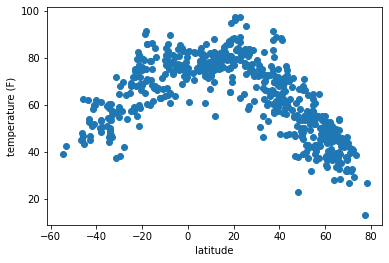

<Figure size 432x288 with 0 Axes>

In [13]:
plt.scatter(lat, temp)
plt.xlabel("latitude")
plt.ylabel("temperature (F)")
plt.show()
plt.savefig("temp vs lat",dpi=100)

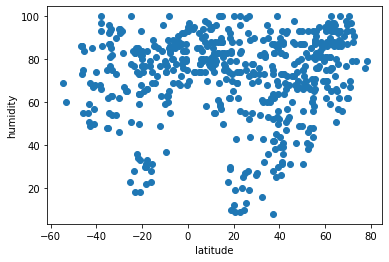

<Figure size 432x288 with 0 Axes>

In [14]:
plt.scatter(lat, humidity)
plt.xlabel("latitude")
plt.ylabel("humidity")
plt.show()
plt.savefig("humidity vs lat",dpi=100)

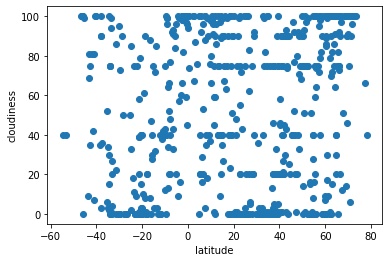

<Figure size 432x288 with 0 Axes>

In [15]:
plt.scatter(lat, cloudiness)
plt.xlabel("latitude")
plt.ylabel("cloudiness")
plt.show()
plt.savefig("cloudiness vs lat",dpi=100)

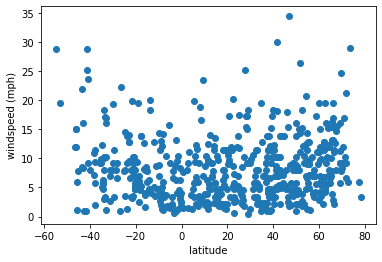

<Figure size 432x288 with 0 Axes>

In [16]:
plt.scatter(lat, wind)
plt.xlabel("latitude")
plt.ylabel("windspeed (mph)")
plt.show()
plt.savefig("wind vs lat",dpi=100)

In [17]:
bins=(-100,0,100)
labels="southern_hem", "northern_hem"
df_split=pd.cut(df["lat"],bins, labels=labels).to_frame().rename(columns={"lat": "hemisphere"})

In [18]:
df_hem=pd.DataFrame.merge(df, df_split, left_index=True, right_index=True)

In [19]:
grouped = df.groupby(df_hem.hemisphere)

northern_hem = grouped.get_group("northern_hem")
southern_hem = grouped.get_group("southern_hem")


In [20]:
northern_hem.head()

,City,lat,lon,temp_F,humidity,cloudiness,wind_mph
1,Flin Flon,54.77,-101.86,62.60,48,40,11.41
5,Beringovskiy,63.05,179.32,36.57,76,15,16.02
6,Kapaa,22.08,-159.32,84.00,62,90,11.41
8,Longyearbyen,78.22,15.64,26.60,79,40,3.36
11,Tasiilaq,65.61,-37.64,33.78,92,100,3.96


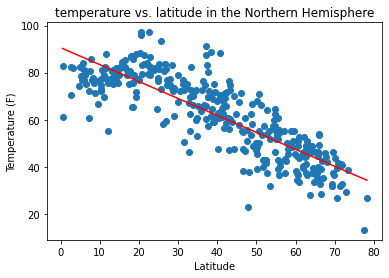

<Figure size 432x288 with 0 Axes>

In [22]:
plt.scatter(northern_hem["lat"],northern_hem["temp_F"])
plt.title("temperature vs. latitude in the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
coeff=np.polyfit(northern_hem["lat"],northern_hem["temp_F"],1)
m=coeff[0]
b=coeff[1]
l_trend=np.arange(min(northern_hem.lat),max(northern_hem.lat),.1)
t_trend=m*l_trend+b
plt.plot(l_trend,t_trend,"r-")
plt.show()
plt.savefig("temp vs lat (northern hem)",dpi=100)

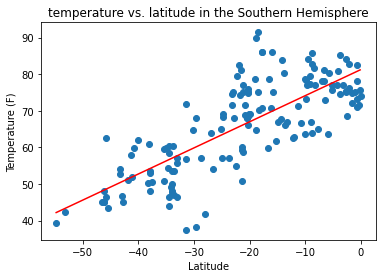

<Figure size 432x288 with 0 Axes>

In [23]:
plt.scatter(southern_hem["lat"],southern_hem["temp_F"])
plt.title("temperature vs. latitude in the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
coeff=np.polyfit(southern_hem["lat"],southern_hem["temp_F"],1)
m=coeff[0]
b=coeff[1]
l_trend=np.arange(min(southern_hem.lat),max(southern_hem.lat),.1)
t_trend=m*l_trend+b
plt.plot(l_trend,t_trend,"r-")
plt.show()
plt.savefig("temp vs lat (southern hem)",dpi=100)

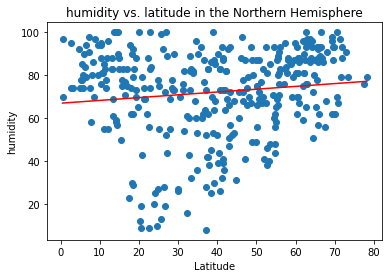

<Figure size 432x288 with 0 Axes>

In [24]:
plt.scatter(northern_hem["lat"],northern_hem["humidity"])
plt.title("humidity vs. latitude in the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("humidity")
coeff=np.polyfit(northern_hem["lat"],northern_hem["humidity"],1)
m=coeff[0]
b=coeff[1]
l_trend=np.arange(min(northern_hem.lat),max(northern_hem.lat),.1)
t_trend=m*l_trend+b
plt.plot(l_trend,t_trend,"r-")
plt.show()
plt.savefig("humidty vs lat (northern hem)",dpi=100)

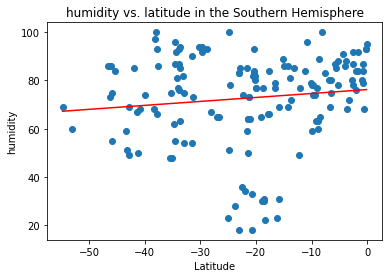

<Figure size 432x288 with 0 Axes>

In [25]:
plt.scatter(southern_hem["lat"],southern_hem["humidity"])
plt.title("humidity vs. latitude in the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("humidity")
coeff=np.polyfit(southern_hem["lat"],southern_hem["humidity"],1)
m=coeff[0]
b=coeff[1]
l_trend=np.arange(min(southern_hem.lat),max(southern_hem.lat),.1)
t_trend=m*l_trend+b
plt.plot(l_trend,t_trend,"r-")
plt.show()
plt.savefig("temp vs lat (southern hem)",dpi=100)

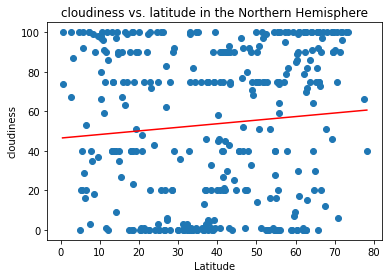

<Figure size 432x288 with 0 Axes>

In [26]:
plt.scatter(northern_hem["lat"],northern_hem["cloudiness"])
plt.title("cloudiness vs. latitude in the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("cloudiness")
coeff=np.polyfit(northern_hem["lat"],northern_hem["cloudiness"],1)
m=coeff[0]
b=coeff[1]
l_trend=np.arange(min(northern_hem.lat),max(northern_hem.lat),.1)
t_trend=m*l_trend+b
plt.plot(l_trend,t_trend,"r-")
plt.show()
plt.savefig("cloudiness vs lat (northern hem)",dpi=100)

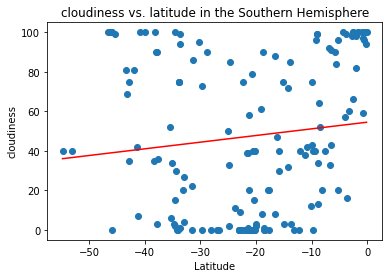

<Figure size 432x288 with 0 Axes>

In [27]:
plt.scatter(southern_hem["lat"],southern_hem["cloudiness"])
plt.title("cloudiness vs. latitude in the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("cloudiness")
coeff=np.polyfit(southern_hem["lat"],southern_hem["cloudiness"],1)
m=coeff[0]
b=coeff[1]
l_trend=np.arange(min(southern_hem.lat),max(southern_hem.lat),.1)
t_trend=m*l_trend+b
plt.plot(l_trend,t_trend,"r-")
plt.show()
plt.savefig("cloudiness vs lat (southern hem)",dpi=100)

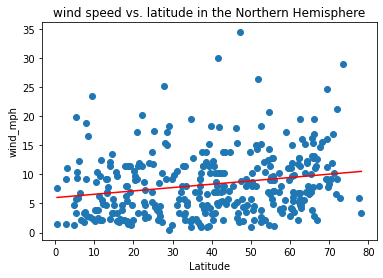

<Figure size 432x288 with 0 Axes>

In [29]:
plt.scatter(northern_hem["lat"],northern_hem["wind_mph"])
plt.title("wind speed vs. latitude in the Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("wind_mph")
coeff=np.polyfit(northern_hem["lat"],northern_hem["wind_mph"],1)
m=coeff[0]
b=coeff[1]
l_trend=np.arange(min(northern_hem.lat),max(northern_hem.lat),.1)
t_trend=m*l_trend+b
plt.plot(l_trend,t_trend,"r-")
plt.show()
plt.savefig("wind vs lat (northern hem)",dpi=100)

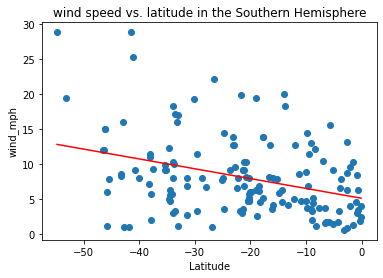

<Figure size 432x288 with 0 Axes>

In [30]:
plt.scatter(southern_hem["lat"],southern_hem["wind_mph"])
plt.title("wind speed vs. latitude in the Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("wind_mph")
coeff=np.polyfit(southern_hem["lat"],southern_hem["wind_mph"],1)
m=coeff[0]
b=coeff[1]
l_trend=np.arange(min(southern_hem.lat),max(southern_hem.lat),.1)
t_trend=m*l_trend+b
plt.plot(l_trend,t_trend,"r-")
plt.show()
plt.savefig("wind vs lat (northern hem)",dpi=100)

In [126]:
df_hem.to_csv("weather_data.csv")